# Comparaison de l'interpolation des données météorologiques en fonction du nombre de plus proches voisins choisit

## Définition des paramètres

In [1]:
# Définition de la station de référence
REF_STATION_NAME = # "Mon site de référence"

# Plus proches voisins retenus
NN_NOMBRE_ARR = # [1, ...]

# Période des données
DATE_DEB_PERIODE = # '2022-01-01T00:00:00Z'
DATE_FIN_PERIODE = # '2024-12-31T00:00:00Z'

## Lecture des données météorologiques pour la station de référence

In [2]:
import meteofrance

# Météo-France API
METEOFRANCE_API = 'DPClim'

# Initialisation d'un client pour configurer l'accès aux données Météo-France même si l'API n'est pas utilisée
client = meteofrance.Client(METEOFRANCE_API)

In [3]:
import pandas as pd

# Fréquence des données climatiques
METEOFRANCE_FREQUENCE = 'quotidienne'

# Lecture des données de la station de référence pour les différents choix des plus proches voisins
df_meteo_ref_dict = {}
for param in NN_NOMBRE_ARR:
    filepath_donnee_ref = meteofrance.get_filepath_donnee_periode(
        client, REF_STATION_NAME, nn_nombre=param,
        date_deb_periode=DATE_DEB_PERIODE, date_fin_periode=DATE_FIN_PERIODE,
        frequence=METEOFRANCE_FREQUENCE, ref=True)

    df_meteo_ref = pd.read_csv(
        filepath_donnee_ref, parse_dates=[client.time_label],
        index_col=client.time_label)

    df_meteo_ref = meteofrance.renommer_variables(
        client, df_meteo_ref, METEOFRANCE_FREQUENCE)

    df_meteo_ref_dict[param] = df_meteo_ref.stack(future_stack=True)

df_meteo_ref_comp = pd.DataFrame(df_meteo_ref_dict).stack().unstack(0).transpose()

df_meteo_ref_comp

etp           precipitation           
                                  3         9             3          9
DATE                                                                  
2022-01-01 00:00:00+00:00  1.092308  1.105877      0.368243   0.398526
2022-01-02 00:00:00+00:00  1.261538  1.268821      0.127469   0.114343
2022-01-03 00:00:00+00:00  0.361538  0.374808     23.452120  23.281892
2022-01-04 00:00:00+00:00  0.630769  0.638673      2.352365   2.293102
2022-01-05 00:00:00+00:00  0.823077  0.834029      0.875521   0.960259
...                             ...       ...           ...        ...
2024-12-27 00:00:00+00:00  0.207939  0.209624      0.127469   0.116365
2024-12-28 00:00:00+00:00  0.115878  0.113663      0.127469   0.124725
2024-12-29 00:00:00+00:00  0.000000  0.004411      0.000000   0.000000
2024-12-30 00:00:00+00:00  0.064592  0.065607      0.127469   0.130236
2024-12-31 00:00:00+00:00  0.244205  0.245128      0.143347   0.156621

[1096 rows x 4 columns]

## Comparaison des séries temporelles

### Pour toute la période

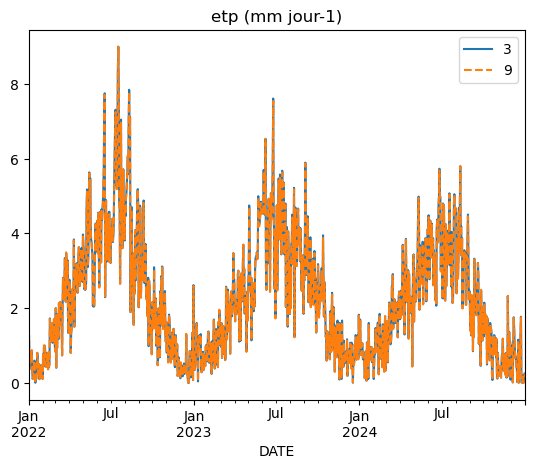

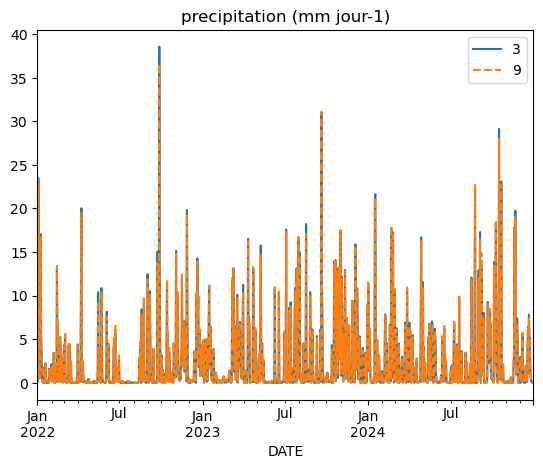

In [4]:
# Plot full time series
style = ['-', '--']
for variable in df_meteo_ref_comp.columns.levels[0]:
    title = f"{variable} ({meteofrance.UNITES[variable]})"
    df_meteo_ref_comp[variable].plot(style=style, title=title)

### Pour l'été

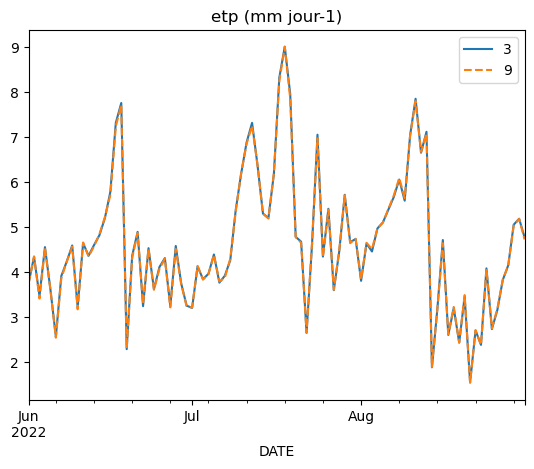

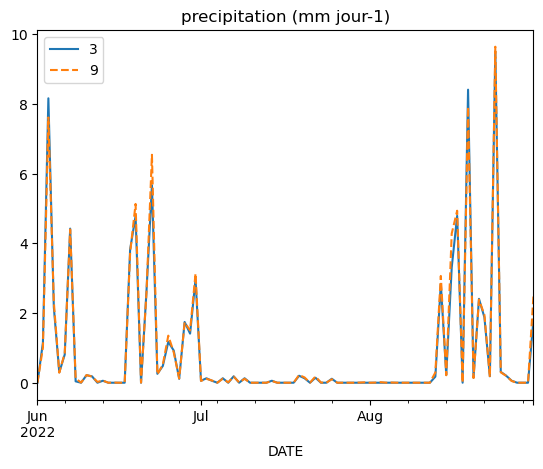

In [5]:
# Plot summer time series
SUMMER_MONTHS = [6, 7, 8]

year = df_meteo_ref_comp.index.year[0]
df_meteo_ref_comp_summer = pd.concat([df_meteo_ref_comp.loc[f"{year}-{month}"]
                                      for month in SUMMER_MONTHS], axis='index')

for variable in df_meteo_ref_comp.columns.levels[0]:
    title = f"{variable} ({meteofrance.UNITES[variable]})"
    df_meteo_ref_comp_summer[variable].plot(style=style, title=title)